accuracy： 
 0.7619047619047619
depth： 4


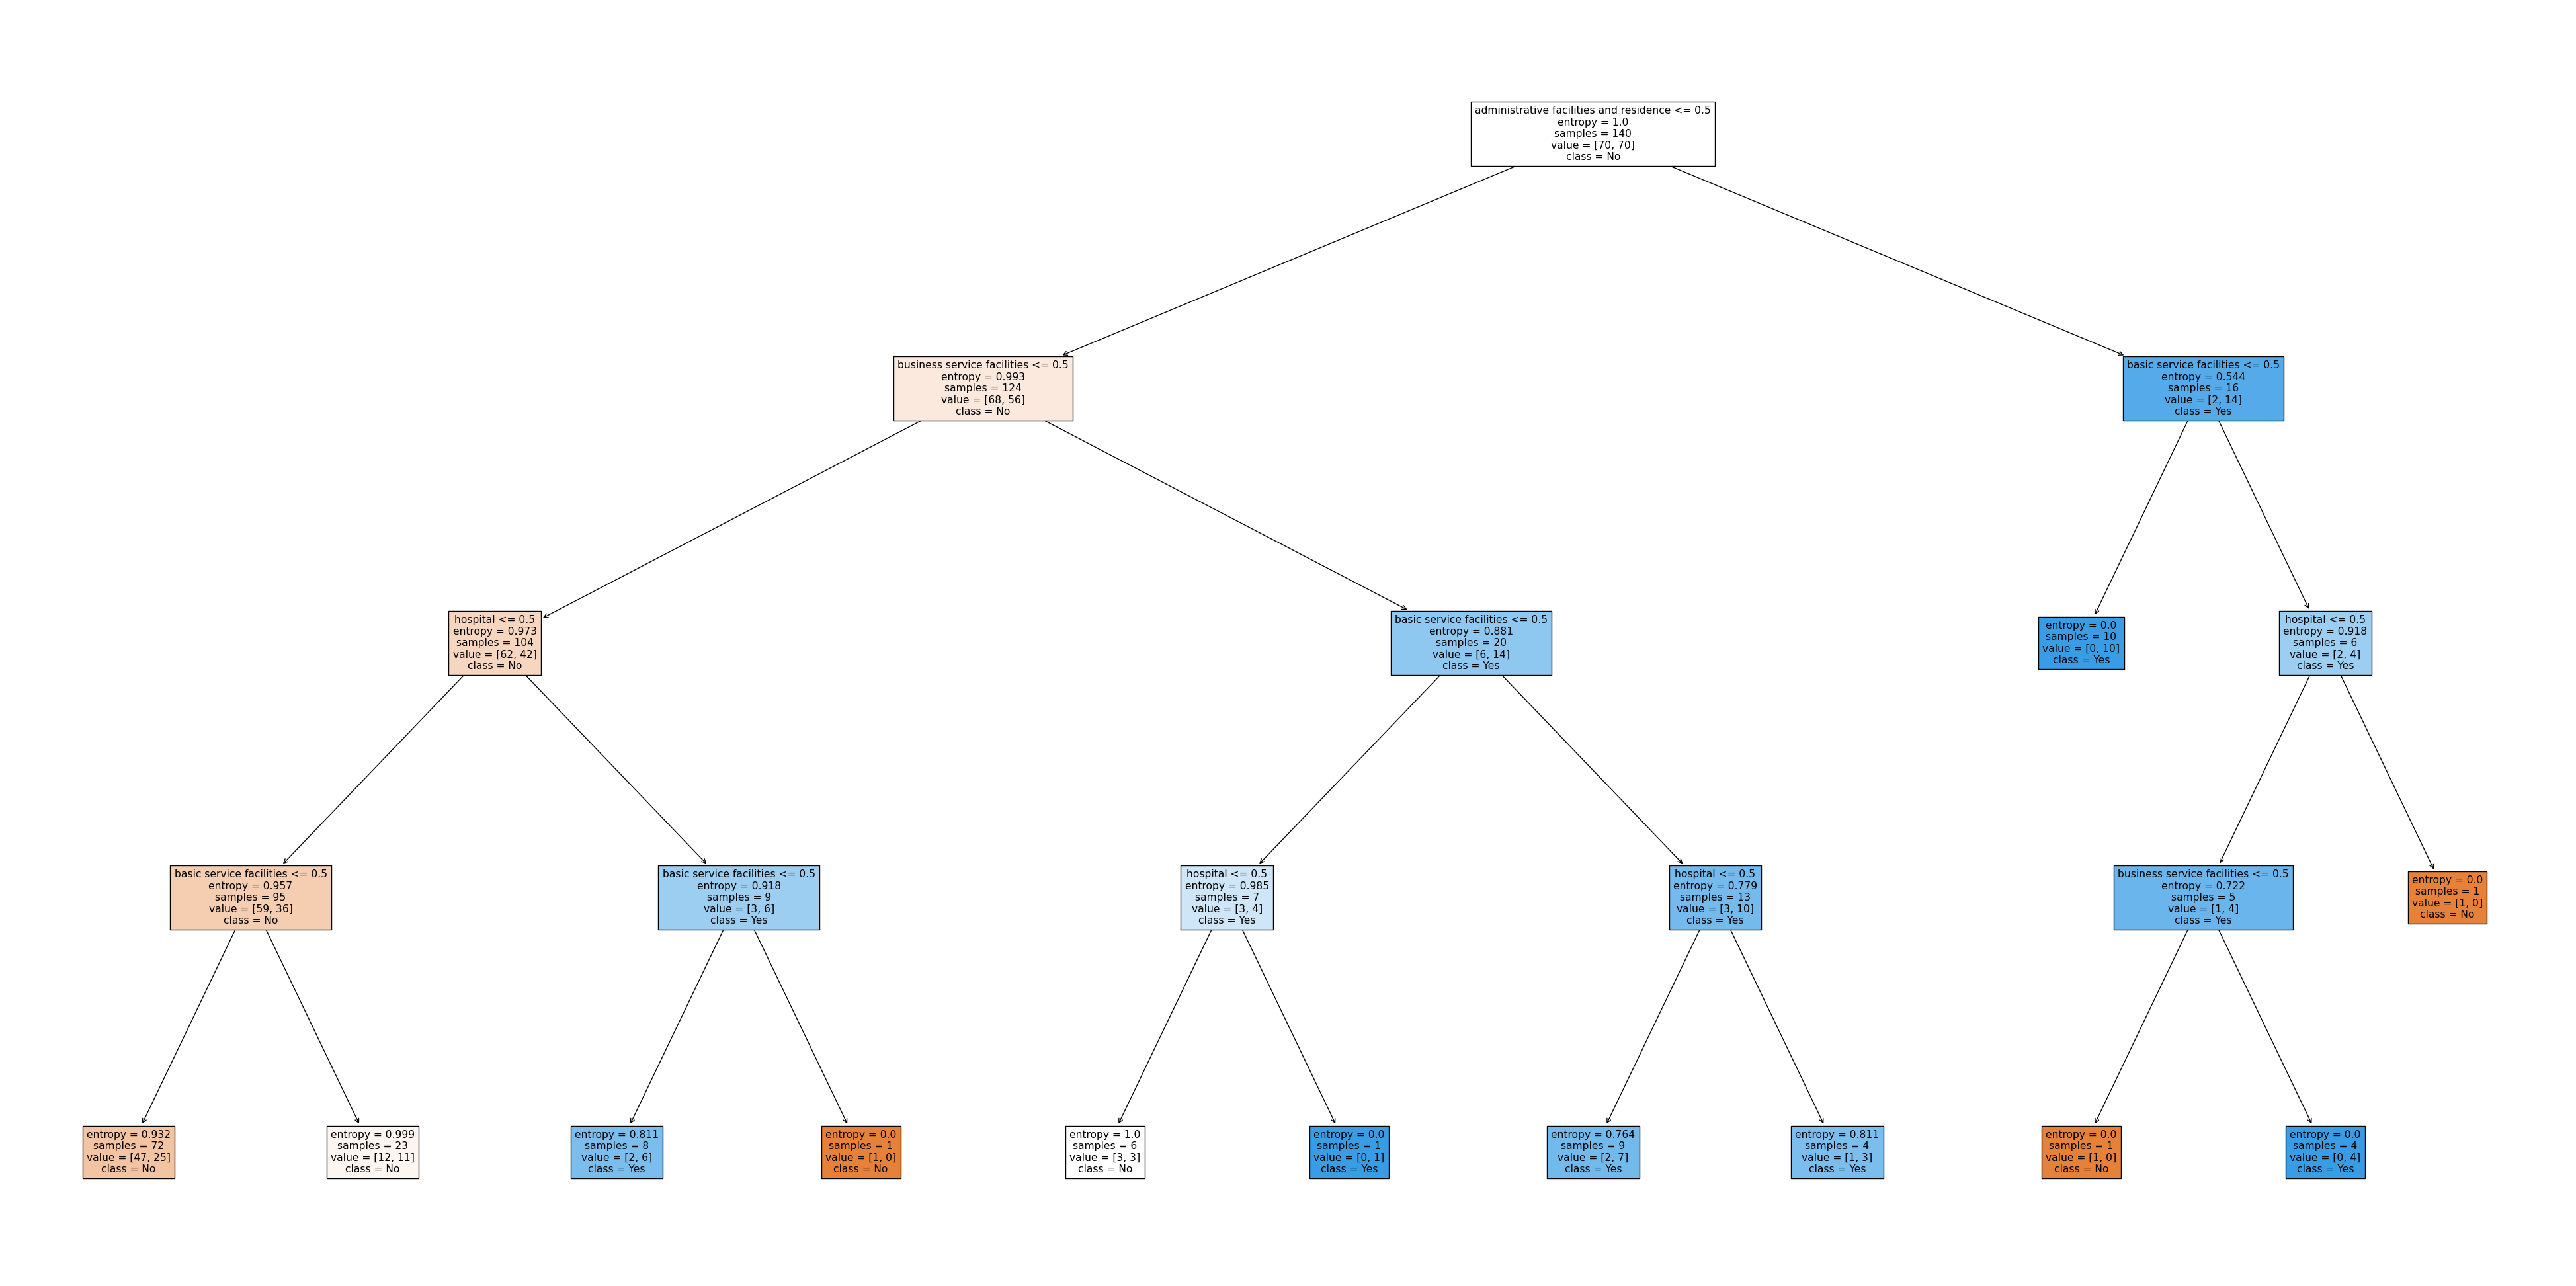

In [1]:
# Decision tree based on ID3 algorithm
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np


London = pd.read_csv('input.csv')

x = London[["basic service facilities", "business service facilities", "administrative facilities and residence", "hospital"]]
y = London["old people's home"]

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=22, train_size=0.7, test_size=0.3)

model = DecisionTreeClassifier(criterion='entropy', max_depth=10, random_state=20)
model.fit(x, y)
score=model.score(x_test, y_test)
print("accuracy： \n", score)
depth = model.get_depth()
print("depth：", depth)

plt.figure(figsize=(50, 25))
plot_tree(model, filled=True, feature_names=["basic service facilities", "business service facilities", "administrative facilities and residence", "hospital"], class_names=["No", "Yes"])
plt.show()

In [2]:
# Random forest
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=500, criterion='entropy', max_depth=10, random_state=22)
rf_model.fit(x_train, y_train)
rf_y_predict = rf_model.predict(x_test)
rf_score=rf_model.score(x_test, y_test)
print("accuracy： \n", rf_score)

accuracy： 
 0.7380952380952381


In [3]:
# Prediction
import joblib
joblib.dump(model, "decisiontree.pkl")
London2=pd.read_csv('class2.csv')
model = joblib.load("decisiontree.pkl")
x_train1 = London2[["basic service facilities", "business service facilities", "administrative facilities and residence", "hospital"]]
london_predict = model.predict(x_train1)
London2.insert(6, 'result', value = london_predict)
London2.to_csv("london_result.csv")

optimal parameter: {'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 9}
score of optimal parameter: 0.6357142857142857
accuracy： 
 0.7380952380952381
accuracy： 
 0.7380952380952381


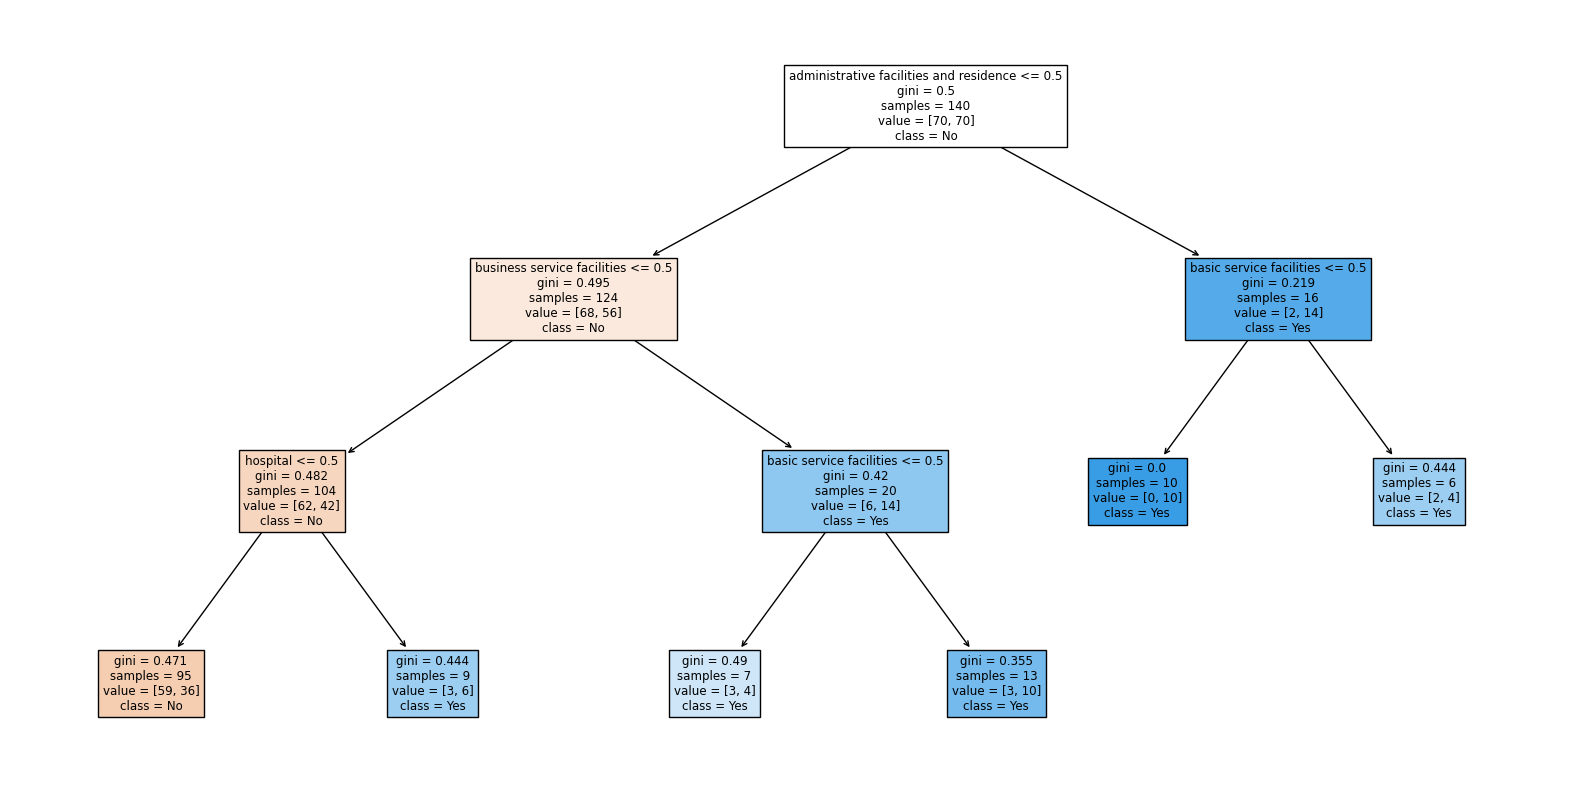

In [4]:
# Optimal parameter
from sklearn.model_selection import GridSearchCV

param_grid = {'max_depth': range(1, 21), 'min_samples_split': range(2, 10), 'min_samples_leaf': range(1, 5)}
grid_search = GridSearchCV(DecisionTreeClassifier(random_state=20), param_grid, cv=5, scoring='accuracy')
grid_search.fit(x, y)

print(f"optimal parameter: {grid_search.best_params_}")
print(f"score of optimal parameter: {grid_search.best_score_}")

optimal_params = grid_search.best_params_
op_model = DecisionTreeClassifier(**optimal_params, random_state=20)
op_model.fit(x, y)
score=op_model.score(x_test, y_test)
print("accuracy： \n", score)

op_rf_model = RandomForestClassifier(n_estimators=500, criterion='entropy', max_depth=10, random_state=22)
op_rf_model.fit(x_train, y_train)
op_rf_y_predict = op_rf_model.predict(x_test)
op_rf_score=op_rf_model.score(x_test, y_test)
print("accuracy： \n", op_rf_score)

plt.figure(figsize=(20, 10))
plot_tree(op_model, filled=True, feature_names=["basic service facilities", "business service facilities", "administrative facilities and residence", "hospital"], class_names=["No", "Yes"])
plt.show()

accuracy： 
 0.6904761904761905
depth： 5


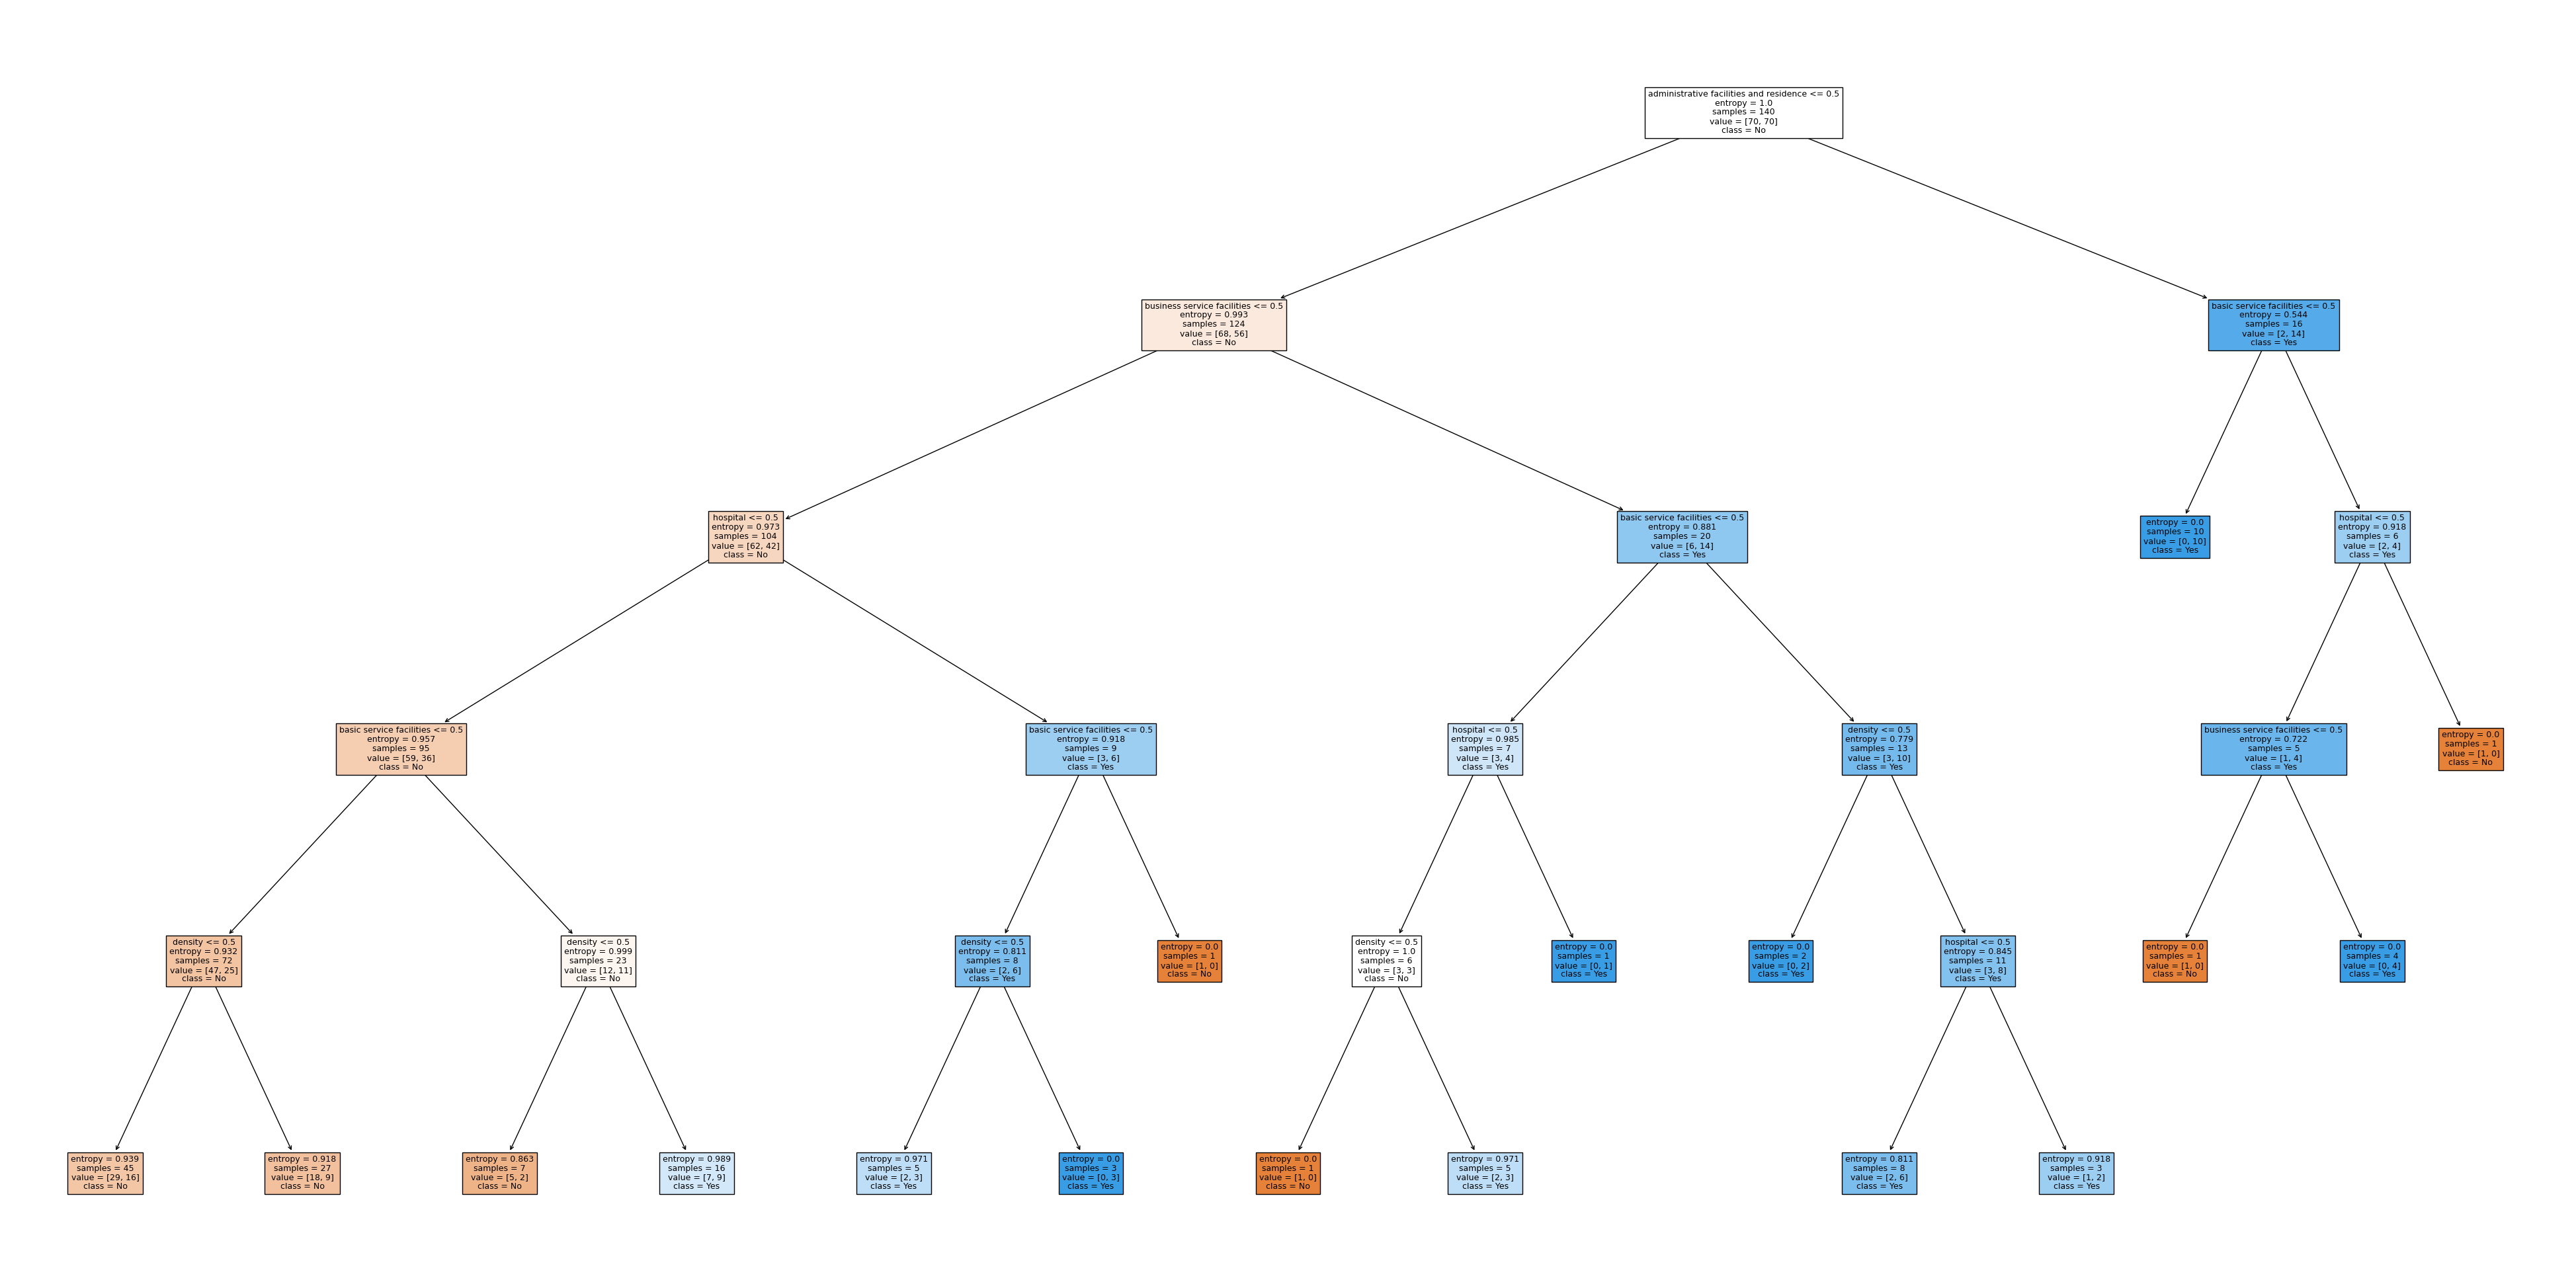

In [5]:
# Involving density of old people
London1 = pd.read_csv('input1.csv')

x = London1[["basic service facilities", "business service facilities", "administrative facilities and residence", "hospital", "density"]]
y = London1["old people's home"]

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=22, train_size=0.7, test_size=0.3)

model2 = DecisionTreeClassifier(criterion='entropy', max_depth=10, random_state=20)
model2.fit(x, y)
score=model2.score(x_test, y_test)
print("accuracy： \n", score)
depth = model2.get_depth() 
print("depth：", depth)

plt.figure(figsize=(50, 25))
plot_tree(model2, filled=True, feature_names=["basic service facilities", "business service facilities", "administrative facilities and residence", "hospital", "density"], class_names=["No", "Yes"])
plt.show()